**Gaia Volpi, ID = 2107759**

## Exercise 1
The number of particles emitted by a radioactive source during a fixed interval of time
(∆t = 10 s) follows a Poisson distribution on the parameter µ. The number of particles
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

 1) Assuming a positive uniform prior distribution for the parameter µ:
- Determine and draw the posterior distribution for µ, given the data.

A flat posterior is a gamma distribution with $\alpha$=1 and $\lambda$=0. Using such prior we obtain a gamma posterior with $\alpha$'=$\alpha + \sum y_i$ and $\beta$'= $\beta + n$.

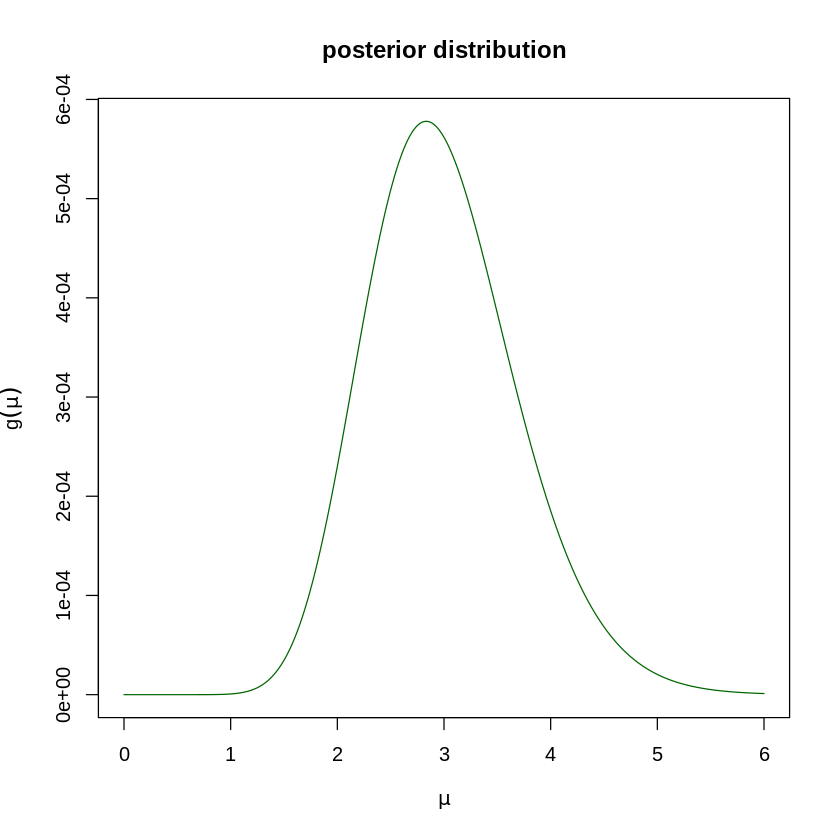

In [5]:
y = c(4,1,3,1,5,3) # observed data
mu = seq(min(y)-1, max(y)+1, by=0.001)
alpha.1 = 1 + sum(y)
beta.1 = 0 + length(y)

p.post = dgamma(mu, shape=alpha.1, rate=beta.1) / sum(dgamma(mu, shape=alpha.1, rate=beta.1)) # normalized
plot(mu, p.post, main='posterior distribution', xlab=expression(mu), ylab=expression(g(mu)), type='l', col='dark green')

- Evaluate mean, median and variance, both analytically and numerically in R.

In [9]:
E.a = alpha.1/beta.1
var.a = alpha.1/(beta.1^2)
median.a = qgamma(0.5, alpha.1, beta.1)
mode.a = (alpha.1-1)/beta.1 ### non sapevo

E.n = sum(mu*p.post)
var.n = sum(mu^2*p.post) - E.n^2
xmedian = sort(rgamma(1e+7, alpha.1, beta.1))
median.n = xmedian[1e+7/2]
mode.n = mu[which.max(p.post)]

cat("Analitical mean:", E.a)
cat("\nAnalitical variance:", var.a)
cat("\nAnalitical median:", median.a)
cat("\nAnalitical mode:", mode.a, '\n')
cat("\nNumerical mean:", E.n)
cat("\nNumerical variance:", var.n)
cat("\nNumerical median:", median.n)
cat("\nNumerical mode:", mode.a)

Analitical mean: 3
Analitical variance: 0.5
Analitical median: 2.944631
Analitical mode: 2.833333 

Numerical mean: 2.99888
Numerical variance: 0.4964523
Numerical median: 2.945048
Numerical mode: 2.833333

2) Assuming a Gamma prior such that the expected value is µ = 3 with a standard deviation σ = 1:
- Determine and draw the posterior distribution for µ, given the data.

For a gamma distribution with $\alpha={(\frac{\mu}{\sigma})}^2$ and $\lambda=\frac{\mu}{{\sigma}^2}$ we obtain a gamma posterior with $\alpha$'=$\alpha + \sum y_i$ and $\lambda$'= $\lambda + n$.

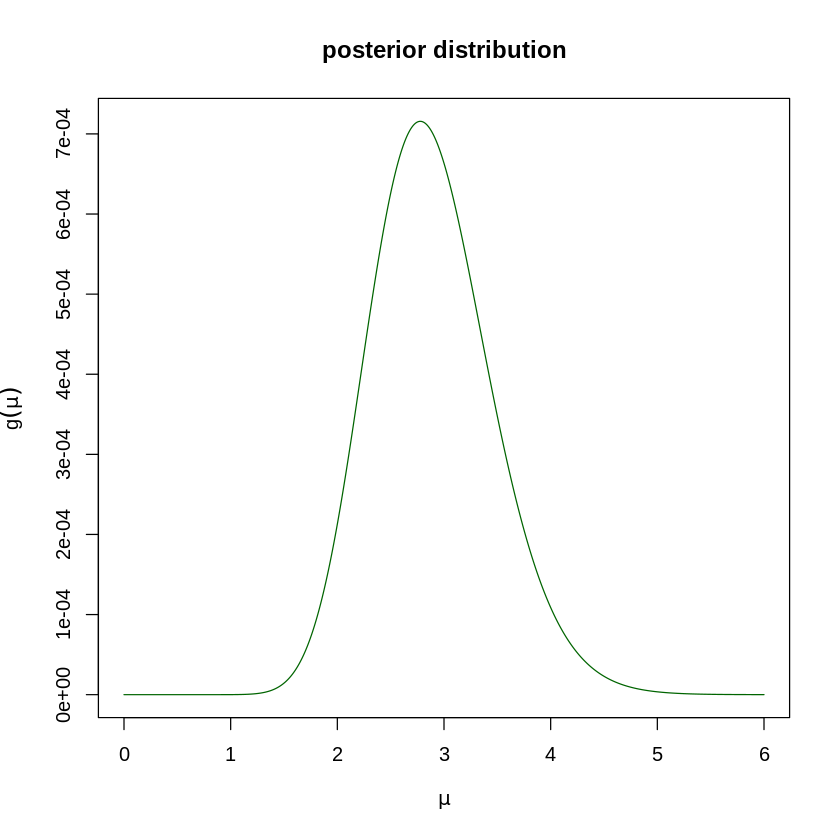

In [10]:
m = 3
s = 1
alpha.2 = (m/s)**2 + sum(y)
beta.2 = m/(s**2) + length(y)

p.post = dgamma(mu, shape=alpha.2, rate=beta.2) / sum(dgamma(mu, shape=alpha.2, rate=beta.2))
plot(mu, p.post, main='posterior distribution', xlab=expression(mu), ylab=expression(g(mu)), type='l', col='dark green')

- Evaluate mean, median and variance, both analytically and numerically in R.

In [11]:
E.a = alpha.2/beta.2
var.a = alpha.2/(beta.2**2)
med.a = qgamma(0.5, shape=alpha.2, rate=beta.2)

E.n = sum(mu*p.post)
var.n = sum(mu^2*p.post) - E.n^2
xmedian = sort(rgamma(1e+7, alpha.2, beta.2))
med.n = xmedian[1e+7/2]

cat("Analitical mean:", E.a)
cat("\nAnalitical variance:", var.a)
cat("\nAnalitical median:", med.a, '\n')
cat("\nNumerical mean:", E.n)
cat("\nNumerical variance:", var.n)
cat("\nNumerical median:", med.n)

Analitical mean: 2.888889
Analitical variance: 0.3209877
Analitical median: 2.851937 

Numerical mean: 2.888861
Numerical variance: 0.320898
Numerical median: 2.852091

3) Evaluate a 95% credibility interval for the results obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation.

In [5]:
CI.u.g= qgamma(c(0.025, 0.975), shape=alpha.1, rate=beta.1) # for a uniform prior
CI.g.g = qgamma(c(0.025, 0.975), shape=alpha.2, rate=beta.2) # for a gamma prior with mean=3, std=1

cat("95% credibility interval for:")
cat(sprintf("\n1- uniform prior and gamma posterior: (%.3f, %.3f)", CI.u.g[1], CI.u.g[2]))
cat(sprintf("\n2- gamma prior and gamma posterior: (%.3f, %.3f)\n", CI.g.g[1], CI.g.g[2]))

95% credibility interval for:
1- uniform prior and gamma posterior: (1.778, 4.536)
2- gamma prior and gamma posterior: (1.887, 4.101)


In [6]:
########## sbagliato non avevo messo la radice quadrata
CI.u.n = qnorm(c(0.025, 0.975), mean=alpha.1/beta.1, sd=sqrt(alpha.1/beta.1^2))
CI.g.n = qnorm(c(0.025, 0.975), mean=alpha.2/beta.2, sd=sqrt(alpha.2/beta.2^2))
cat("95% credibility interval for:")
cat(sprintf("\n1- uniform prior and normal posterior: (%.3f, %.3f)", CI.u.n[1], CI.u.n[2]))
cat(sprintf("\n2- gamma prior and normal posterior: (%.3f, %.3f)\n", CI.g.n[1], CI.g.n[2]))

95% credibility interval for:
1- uniform prior and normal posterior: (1.614, 4.386)
2- gamma prior and normal posterior: (1.778, 3.999)


## Exercise 2
A researcher A wants to evaluate the efficiency of Det2. For this purpose, he sets up an apparatus where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorded simultaneously by Det1 and Det3, and r be those also recorded by Det2, researcher A obtains n = 500 and r = 312.

Assuming a binomial model where n is the number of trials and r is the number of success out of n trials:
1) Evaluate the mean and the variance and plot the posterior distributions using a Bayesian approach under the hypothesis of:
- Uniform prior ∼ U(0, 1)

Mean: 0.623506, Variance: 0.000467

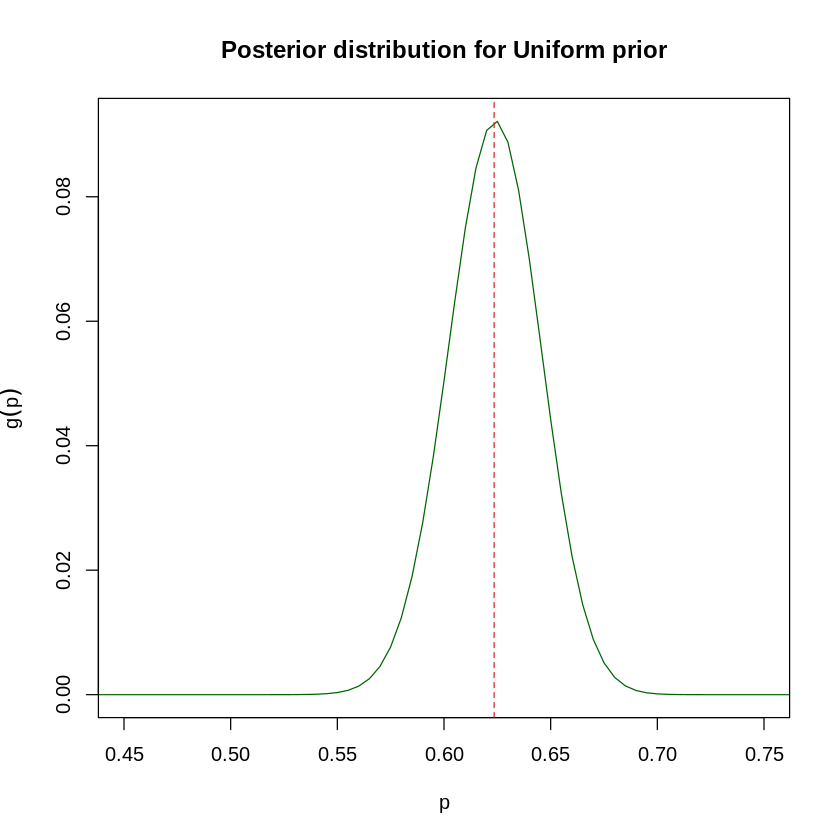

In [18]:
# this is right but it would be more efficient if i used a conjugate prior (beta(1,1)) and formulas for mean and var of the beta distribution 
n = 500
r = 312
p = seq(0, 1, length.out = 201)
p.star = dbinom(x=r, size=n, prob=p)
p.post = p.star / sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2
cat(sprintf("Mean: %f, Variance: %f", mean, var))

plot(p, p.post, type='l', xlab="p", ylab=expression(g(p)), main='Posterior distribution for Uniform prior', xlim=c(0.45, 0.75), col='dark green')
abline(v=mean, col='firebrick3',lty=2)

In [21]:
# correction
beta.stat = function(alpha.prior, beta.prior, n, r){
    alpha = alpha.prior+r
    beta = beta.prior+n-r
    mean = alpha/(alpha+beta)
    var = (alpha*beta)/ (alpha+beta)^2 / (alpha+beta+1)
    return(c(mean, var))
}

n = 500
r = 312
cat(sprintf("Mean: %f, Variance: %f", beta.stat(1,1,n,r)[1], beta.stat(1,1,n,r)[2]))

Mean: 0.623506, Variance: 0.000467

- Jeffrey’s prior ∼ Beta(1/2, 1/2)

Mean: 0.623752, Variance: 0.000468

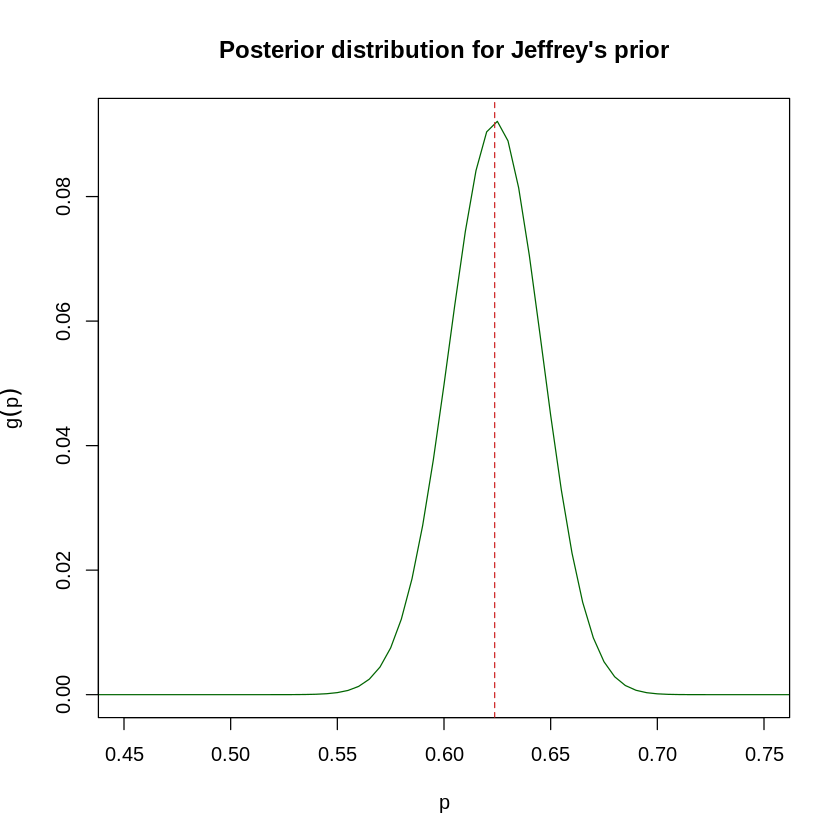

In [8]:
n = 500
r = 312
p = seq(0, 1, length.out = 201)
p.star = dbeta(p, shape1=r+0.5, shape2=n-r+0.5)
p.post = p.star / sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2
cat(sprintf("Mean: %f, Variance: %f", mean, var))

plot(p, p.post, type='l', xlab="p", ylab=expression(g(p)), main="Posterior distribution for Jeffrey's prior", xlim=c(0.45, 0.75), col='dark green')
abline(v=mean, col='firebrick3',lty=2)

In [22]:
# correction

cat(sprintf("Mean: %f, Variance: %f", beta.stat(0.5,0.5,n,r)[1], beta.stat(0.5,0.5,n,r)[2]))

Mean: 0.623752, Variance: 0.000468

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals:

3) Evaluate the mean, the variance and the posterior distribution using a uniform prior with the results of researcher B.

Mean: 0.918937, Variance: 0.005903

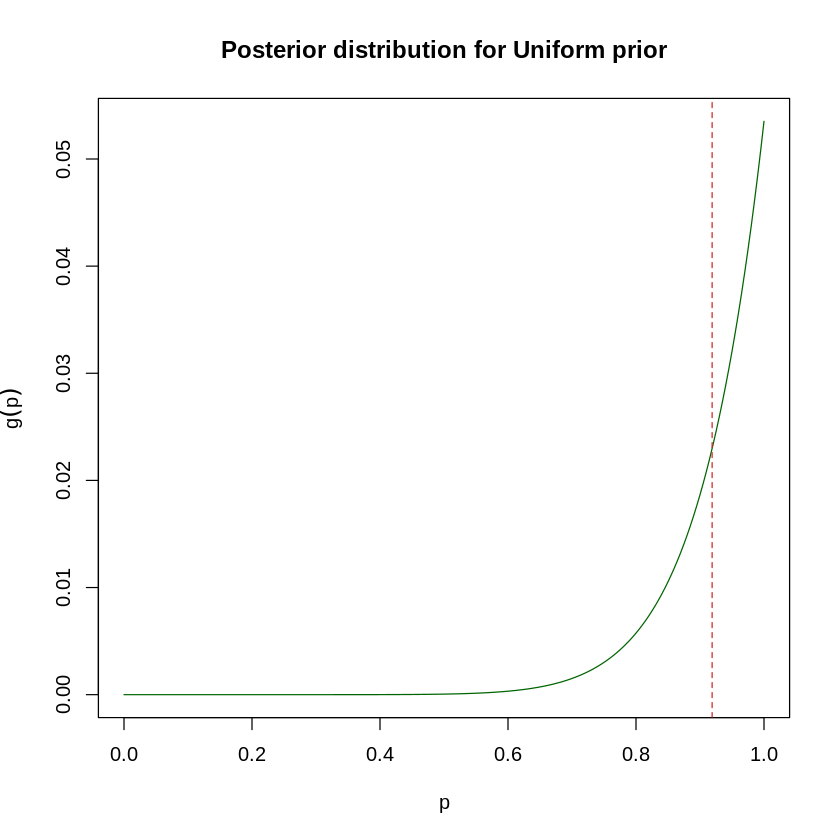

In [9]:
n = 10
r = 10
p = seq(0, 1, length.out = 201)
p.star = dbinom(x=r, size=n, prob=p)
p.post = p.star / sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2
cat(sprintf("Mean: %f, Variance: %f", mean, var))

plot(p, p.post, type='l', xlab="p", ylab=expression(g(p)), main='Posterior distribution for Uniform prior', col='dark green')
abline(v=mean, col='firebrick3',lty=2)

In [23]:
# correction
n = 10
r = 10
cat(sprintf("Mean: %f, Variance: %f", beta.stat(1,1,n,r)[1], beta.stat(1,1,n,r)[2]))

Mean: 0.916667, Variance: 0.005876

4) Repeat the computation of points 1) and 2) with the data of researcher A using as a prior the posterior obtained from point 3).

Mean: 0.631115, Variance: 0.000455

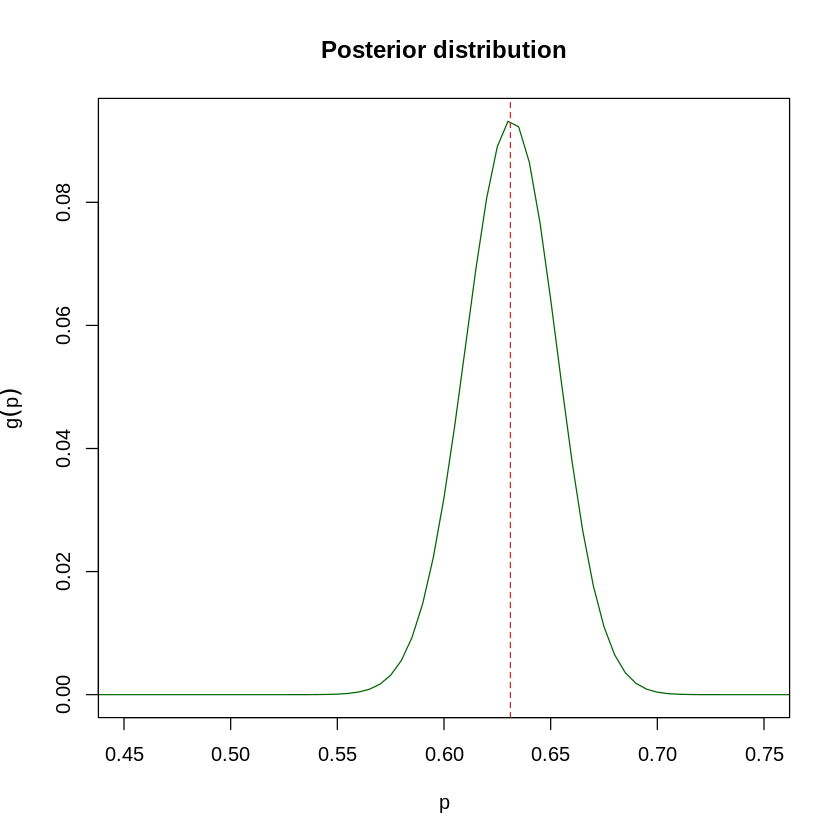

In [70]:
n = 500
r = 312
p = seq(0, 1, length.out = 201)
p.prior = dbinom(x=10, size=10, prob=p)
p.star = p.prior*dbeta(p, shape1=r+0.5, shape2=n-r+0.5)
p.post = p.star / sum(p.star)

mean = sum(p*p.post)
var = sum(p^2*p.post) - mean^2
cat(sprintf("Mean: %f, Variance: %f", mean, var))

plot(p, p.post, type='l', xlab="p", ylab=expression(g(p)), main="Posterior distribution", xlim=c(0.45, 0.75), col='dark green')
abline(v=mean, col='firebrick3',lty=2)

In [24]:
# correction
n=500
r=312
cat(sprintf("Mean: %f, Variance: %f", beta.stat(1+10,1,n,r)[1], beta.stat(1+10,1,n,r)[2]))

Mean: 0.630859, Variance: 0.000454

## Exercise 3
A coin is flipped n = 30 times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

1) Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

The appropriate Likelihood describing the toss of a coin is the binomial distribution.

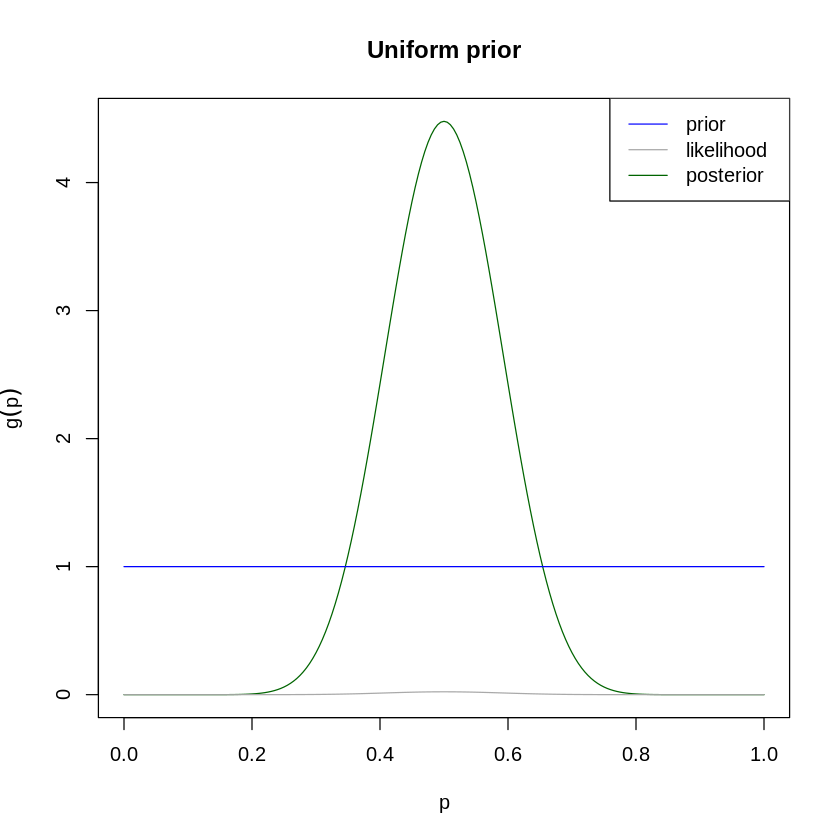

In [14]:
# Let's work with a flat prior 
n = 30
r = 15 # times we get tails 
p = seq(0, 1, length.out = 201)
likelihood = dbinom(x=r, size=n, prob=p) / sum(dbinom(x=r, size=n, prob=p))

u.prior = dbeta(p, shape1=1, shape2=1)
u.post = dbeta(p, shape1=1+r, shape2=n-r+1)

plot(p, u.post, type='l', xlab='p', ylab=expression(g(p)), main='Uniform prior', col='dark green')
lines(p, u.prior, type='l', col='blue')
lines(p, likelihood, type='l', col='dark grey')
legend('topright', legend = c('prior', 'likelihood', 'posterior'), col = c('blue', 'dark grey', 'dark green'), lty = 1)

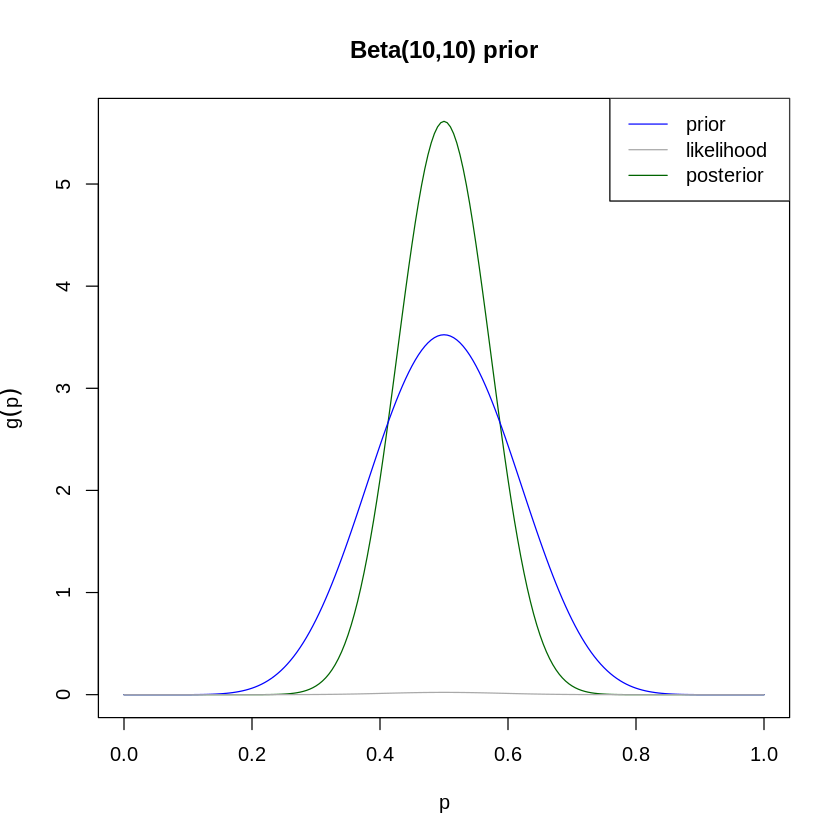

In [15]:
# Let's work with a beta(10,10) prior 
b.prior = dbeta(p, shape1=10, shape2=10)
b.post = dbeta(p, shape1=10+r, shape2=n-r+10)

plot(p, b.post, type='l', xlab='p', ylab=expression(g(p)), main='Beta(10,10) prior', col='dark green')
lines(p, b.prior, type='l', col='blue')
lines(p, likelihood, type='l', col='dark grey')
legend('topright', legend = c('prior', 'likelihood', 'posterior'), col = c('blue', 'dark grey', 'dark green'), lty = 1)

2) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [16]:
CI.u = qbeta(c(0.025, 0.975), shape1=1+r, shape2=n-r+1) # for a uniform prior
CI.b = qbeta(c(0.025, 0.975), shape1=10+r, shape2=n-r+10) # for a beta(10,10) prior

cat("95% credibility interval for:")
cat(sprintf("\n1- uniform prior: (%.3f, %.3f)", CI.u[1], CI.u[2]))
cat(sprintf("\n2- beta(10,10) prior: (%.3f, %.3f)\n", CI.b[1], CI.b[2]))

cat("\nMost probable value for the coin probability p for:")
cat(sprintf("\n1- uniform prior: %.2f", p[which.max(u.post)]))
cat(sprintf("\n2- beta(10,10) prior: %.2f", p[which.max(b.post)]))            

95% credibility interval for:
1- uniform prior: (0.331, 0.669)
2- beta(10,10) prior: (0.363, 0.637)

Most probable value for the coin probability p for:
1- uniform prior: 0.50
2- beta(10,10) prior: 0.50

3) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

In [44]:
# avevo fatto il plot completamente sbagliato 
library(tibble)
library(dplyr)
library(ggplot2)

results = c(0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1)

analysis = tibble(
    Toss = 1:length(results),
    Result = results,
    Alpha = rep(1, length(results)),
    Beta = rep(1, length(results))
    )

analysis = analysis %>% mutate(
    Alpha = cumsum(Result) + 1,
    Beta = cumsum(1-Result) +1, 
    Mean = Alpha / (Alpha+Beta),
    Mode = (Alpha-1) / (Alpha+Beta-2),
    LowerCI = qbeta(0.025, Alpha, Beta),
    UpperCI = qbeta(0.975, Alpha, Beta)
    )

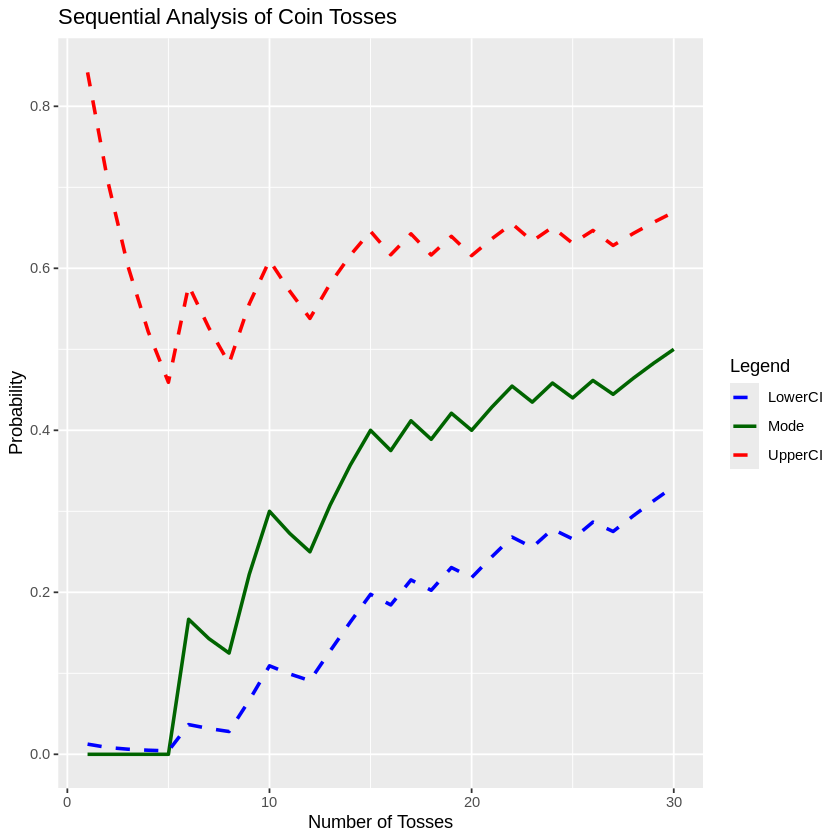

In [50]:
# Plot the Mode and Credibility Interval
ggplot(analysis, aes(x = Toss)) + 
    geom_line(aes(y = Mode, color = "Mode"), linewidth = 1) +
    geom_line(aes(y = LowerCI, color = "LowerCI"), linetype = "dashed", linewidth = 1) +
    geom_line(aes(y = UpperCI, color = "UpperCI"), linetype = "dashed", linewidth = 1) +
    labs(title = "Sequential Analysis of Coin Tosses", x = "Number of Tosses", y = "Probability", color = "Legend") +
    scale_color_manual(values = c("Mode" = "darkgreen", "LowerCI" = "blue", "UpperCI" = "red")) 


4) Do you get a different result, by analysing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

In [55]:
last.analysis = tail(analysis, 1)
u.mode = p[which.max(u.post)]

cat("[Flat Prior - One step analysis ] Mode : ", u.mode, '\n')
cat("[Flat Prior - Sequential analysis ] Mode : ", last.analysis$Mode)

[Flat Prior - One step analysis ] Mode :  0.5 
[Flat Prior - Sequential analysis ] Mode :  0.5

## Exercise 4
A couple of days before an election in which four parties (A,B,C,D) compete, a poll is taken using a sample of 200 voters who express the following preferences 57, 31,45 and 67 for, respectively, parties A,B,C and D.

Using a Bayesian approach, for all parties
1) Calculate the expected percentage of votes and a 68% credibility interval by assuming a:
- Uniform prior.

To calculate the expected percentage of votes I apply Bayes' Theorem, using as likelihood a Bernoulli distribution.

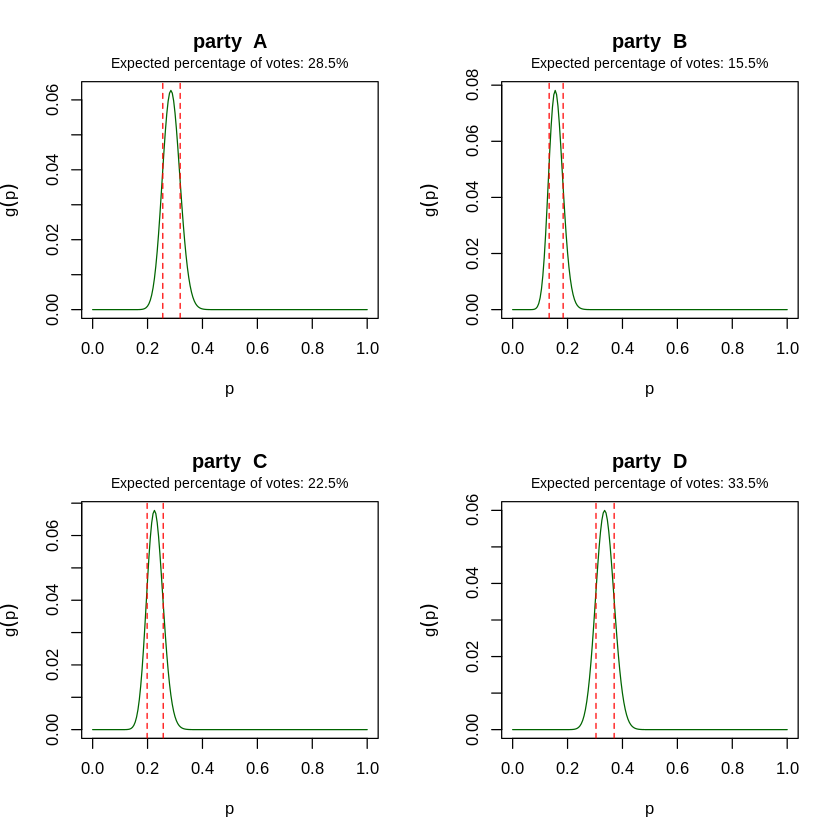

In [69]:
n = 200
party = c('A', 'B', 'C', 'D')
r = c(57, 31, 45, 67)
p = seq(0, 1, length.out = 201)

par(mfrow = c(2, 2))

for(i in seq(1,length(r))) {
    alpha = 1+r[i]
    beta = 1+n-r[i]
    p.star = dbeta(p, shape1=alpha, shape2=beta) # posterior distribution obtained by using a flat prior - beta(1,1)
    p.post = p.star / sum(p.star)
    plot(p, p.post, type='l', xlab='p', ylab=expression(g(p)), main=paste('party ',party[i]), col='dark green')
    CI = qbeta(c(0.16, 0.84), shape1=alpha, shape2=beta)
    abline(v=CI[1] , lty=2, col='red')
    abline(v=CI[2] , lty=2, col='red')
    mode = (alpha-1) / (alpha+beta-2)
    mtext(sprintf("Expected percentage of votes: %.1f%%", mode* 100), side = 3, line = 0.5, at = 0.5, cex=0.7)  
}

- Prior constructed from the results obtained from another poll conducted the previous week on a sample of 100 voters who expressed the following preferences 32,14,26,28 for, respectively, parties A,B,C and D

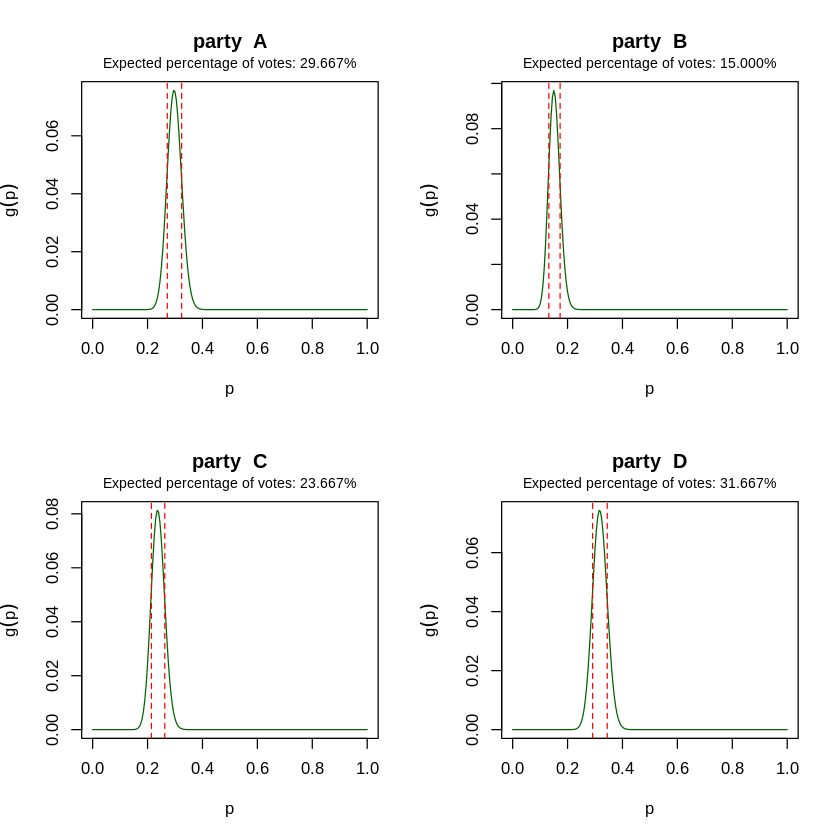

In [75]:
# dovevo prendere come prior quella costruita da uniform prior + risultati del primo sondaggio 

n.prior = 100
r.prior = c(32, 14, 26, 28)

par(mfrow = c(2, 2))

for(i in seq(1,length(r))) {
    alpha.p = 1+r.prior[i] 
    alpha = alpha.p +r[i]
    beta.p = 1+n.prior-r.prior[i]
    beta = beta.p+n-r[i]
    p.star = dbeta(p, shape1=alpha, shape2=beta) # posterior obtained by using a beta(1+r.prior,1+n.prior-r.prior) prior
    p.post = p.star / sum(p.star)
    plot(p, p.post, type='l', xlab='p', ylab=expression(g(p)), main=paste('party ',party[i]), col='dark green')
    CI = qbeta(c(0.16, 0.84), shape1=alpha, shape2=beta)
    abline(v=CI[1] , lty=2, col='red')
    abline(v=CI[2] , lty=2, col='red')
    mode = (alpha-1) / (alpha+beta-2) 
    mtext(sprintf("Expected percentage of votes: %.3f%%", mode* 100), side = 3, line = 0.5, at = 0.5, cex=0.7)  
}

2) Calculate the sample size to obtain a margin of error less or equal than ±3% for each party.

I invert the formula of the marginal error $err = z \sqrt{\frac{p(1-p)}{n}}$ - where z is the z-score for a 68% credibility interval, p is the proportion obtained in the poll and n the sample size - to obtain n.

In [76]:
z = 0.84
p = c(57/200, 31/200, 45/200, 67/200)
err = 0.03

fun = function(z, p, err){
    n = c(0)
        for (i in 1:length(p)){
            res = z^2 * p[i] * (1-p[i]) /err^2
            n = append(n, res)
        }
    return(n[-1])}

cat(sprintf("To obtain a margin of error less then or equal to +-3%% for each party we would need %.f voters", max(round(fun(z,p,err), 0))))

To obtain a margin of error less then or equal to +-3% for each party we would need 175 voters